# Bike Data Analysis
## Notes on the Data
- Start Station Id is always an int, although Start Station Name may be NULL. 
  - What does NULL mean? insertion from repair?
  - 28228 / 200_000 rides have null start station; also roughly 28225 / 200_000 rides have null name end station
    - Hypothesis: No valid Id | System Error
    - Notably, in Feb - June data, there are no NaN end stations (all integers) 
      - possibly, the data format has changed
  - How are repairs, temporary bike removal modeled in the data?
  - When are bikes typically repaired? / relocated?
- End Station Id may be nan. What does that mean?
  - Note: 95 Nan End stations in Jan 2024 of roughly 200_000 rides total. Note: this is always station 9737
  - 
  - Hypothesis: Manual repositioning / repairs | repositioning.
- Note: files have `cp1252` encoding
- Note: Station IDs start at 7000


## Geospatial Analysis and Visualization
- Retrieve geospatial coordinates for the respective stations from the stations file or the current up-to-date station data from the other repo. (Check that ids match, otherwise match street names)
- 



In [43]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = '../data/bikeshare-ridership-2024/Bike share ridership 2024-06.csv'


ridership_table = pd.read_csv("../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv", encoding='cp1252')
# for jan 2024 utf 8 encoding; other months cp1252

# Display the first few rows of the DataFrame
ridership_table.info()

AttributeError: 'DataFrame' object has no attribute 'astypes'

In [27]:
ridership_table[ridership_table['Bike Id'].isna()]

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model


In [31]:
def preprocess_table(df):
    df = df[df["Trip  Duration"] != 0]
    df = df[df["End Station Id"].notna()]
    df.astypes({"End Station Id": int})
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['End Time'] = pd.to_datetime(df['End Time'])

    return df
ridership_table = preprocess_table(ridership_table)
ridership_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685782 entries, 0 to 685781
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             685782 non-null  int64 
 1   Trip  Duration      685782 non-null  int64 
 2   Start Station Id    685782 non-null  int64 
 3   Start Time          685782 non-null  object
 4   Start Station Name  685748 non-null  object
 5   End Station Id      685782 non-null  int64 
 6   End Time            685782 non-null  object
 7   End Station Name    685744 non-null  object
 8   Bike Id             685782 non-null  int64 
 9   User Type           685782 non-null  object
 10  Model               685782 non-null  object
dtypes: int64(5), object(6)
memory usage: 57.6+ MB


In [14]:
ridership_table[ridership_table['End Station Name'].isnull()]

,ï»¿Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
4,26682746,2118,7721,01/01/2024 00:04,NaN,7721.0,01/01/2024 00:40,NaN,1008,Casual Member
6,26682748,3014,7788,01/01/2024 00:05,NaN,7686.0,01/01/2024 00:55,NaN,5130,Casual Member
20,26682765,4327,7881,01/01/2024 00:14,NaN,NaN,01/01/2024 01:27,NaN,3379,Casual Member
24,26682770,598,7261,01/01/2024 00:16,Queens Quay E / Lower Sherbourne St,7911.0,01/01/2024 00:26,NaN,6454,Casual Member
27,26682773,456,7810,01/01/2024 00:17,NaN,7815.0,01/01/2024 00:24,NaN,4231,Casual Member
...,...,...,...,...,...,...,...,...,...,...
204851,26916615,183,7311,01/31/2024 23:51,Sherbourne St / Isabella St,7724.0,01/31/2024 23:54,NaN,3181,Casual Member
204852,26916616,523,7204,01/31/2024 23:51,College St / Crawford St,7905.0,02/01/2024 00:00,NaN,5819,Casual Member
204853,26916617,919,7821,01/31/2024 23:51,NaN,7821.0,02/01/2024 00:06,NaN,1843,Casual Member
204854,26916618,1015,7523,01/31/2024 23:52,Lynn Williams St / East Liberty St - SMART,7770.0,02/01/2024 00:08,NaN,6084,Casual Member


In [2]:
# Print the column headers of the bike_share_data DataFrame
print(ridership_table.columns)
row_names = ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type']

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')


In [3]:
# get average trip duration
average_trip_duration_min = ridership_table['Trip  Duration'].mean() / 60
print(f"Average trip duration: {average_trip_duration_min:.2f} minutes")

Average trip duration: 14.61 minutes


In [134]:
if not 'an' in globals():
    print('importing analysis')
    import analysis as an
else:
    print('reloading analysis')
    import importlib
    importlib.reload(an)

process_data = False
reload_data = True

name = '2024-5'
file = '../data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv'

if process_data:
    ridership_table = pd.read_csv(file, encoding='cp1252')
    data = an.BikeShareData(name)
    data.load_data(ridership_table)
    data.save_pickle()

if reload_data:
    data = an.BikeShareData(name)
    data = an.BikeShareData.load_from_pickle(name = name)


reloading analysis


In [109]:
df = an.preprocess_ridership_table(ridership_table)

In [141]:
in_bikes, out_bikes = data._process_data_by_minute(df)
in_rates, out_rates = data.calculate_in_out_rates(σ_minutes=60) # 60 minutes is probably good


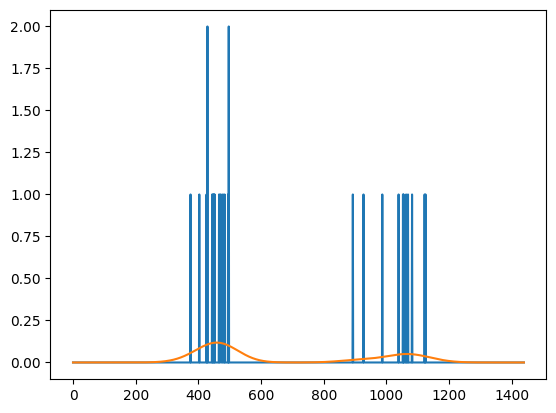

In [144]:
import matplotlib.pyplot as plt

time_range = range(0, 24 * 60)
station = 5

plt.plot(_bikes[station, time_range]) # Station 7000 over the whole month
plt.plot(in_rates[station, time_range]) # look at the first day

In [ ]:
# visualize the out-taken bikes by the size of circle in a folium map
import folium
from folium import plugins
from folium.plugins import HeatMap

m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)



In [38]:
import numpy as np

def argmax(dict):
    return max(dict.keys(), key = lambda x: dict[x])

data.stations.keys()
ind = argmax({key: station.capacity for key, station in data.stations.items()})

print("ind: ", ind)
max_cap_station = data.stations[ind]
max_cap_station

ind:  7041


BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=-1, num_bikes_t0=0, num_bikes=SparseSequence([(Timestamp('2024-01-01 00:00:00'), 0), (Timestamp('2024-01-01 00:00:00'), -1), (Timestamp('2024-01-01 00:03:00'), -2)]))

Text(0.5, 1.0, 'Distribution of Trip Durations')

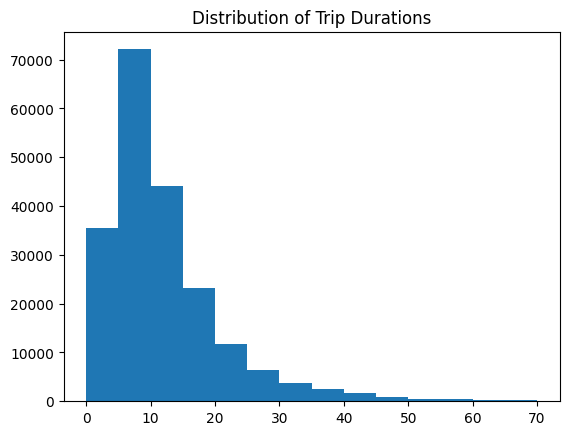

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of the trip durations
plt.hist(ridership_table['Trip  Duration'] / 60, bins=range(0, 75, 5))
plt.title('Distribution of Trip Durations')

In [8]:
one_station = bike_share_data.stations[list(bike_share_data.stations.keys())[0]]
print(one_station)
print(one_station.num_bikes)

BikeStation(station_id=7041, name='Edward St / Yonge St', lat=nan, lon=nan, capacity=np.int64(84), num_bikes_t0=np.int64(7), num_bikes=<analysis.SparseSequence object at 0x76a38298a4e0>)
